# In this notebook I'll apply a CNN to classify house prices, above or below average

### importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

### read dataset and show info. 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataScience/housepricedata.csv')

In [ ]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
df.tail()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0
1459,9937,5,6,1256,1,1,3,6,0,276,0


In [ ]:
df.shape

(1460, 11)

In [ ]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


no nulls

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0


### separate target from features

In [ ]:
X=df.drop('AboveMedianPrice',axis=1).values
y=df['AboveMedianPrice'].values

### normalize

In [ ]:
sc=preprocessing.MinMaxScaler()
x_sc=sc.fit_transform(X)

In [ ]:
x_sc.shape

(1460, 10)

In [ ]:
x_sc[:10]

array([[0.0334198 , 0.66666667, 0.5       , 0.1400982 , 0.66666667,
        0.5       , 0.375     , 0.5       , 0.        , 0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , 0.20654664, 0.66666667,
        0.        , 0.375     , 0.33333333, 0.33333333, 0.32440056],
       [0.04650728, 0.66666667, 0.5       , 0.15057283, 0.66666667,
        0.5       , 0.375     , 0.33333333, 0.33333333, 0.42877292],
       [0.03856131, 0.66666667, 0.5       , 0.12373159, 0.33333333,
        0.        , 0.375     , 0.41666667, 0.33333333, 0.45275035],
       [0.06057632, 0.77777778, 0.5       , 0.18739771, 0.66666667,
        0.5       , 0.5       , 0.58333333, 0.33333333, 0.58956276],
       [0.05989857, 0.44444444, 0.5       , 0.13027823, 0.33333333,
        0.5       , 0.125     , 0.25      , 0.        , 0.33850494],
       [0.04105728, 0.77777778, 0.5       , 0.27594108, 0.66666667,
        0.        , 0.375     , 0.41666667, 0.33333333, 0.44851904],
       [0.04245016, 0.66666667, 0.625    

### split data into train/test/val 70,15,15

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_sc, y, test_size=0.3)

In [ ]:
X_train.shape

(1022, 10)

In [ ]:
X_test.shape

(438, 10)

In [ ]:
Y_train.shape

(1022,)

In [ ]:
Y_test.shape

(438,)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

## first model

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6799 - accuracy: 0.7020 - val_loss: 0.6776 - val_accuracy: 0.7032
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.7180 - val_loss: 0.6737 - val_accuracy: 0.7078
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.7283 - val_loss: 0.6700 - val_accuracy: 0.7078
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.7543 - val_loss: 0.6658 - val_accuracy: 0.7260
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7489 - val_loss: 0.6614 - val_accuracy: 0.7534
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.7811 - val_loss: 0.6570 - val_accuracy: 0.7626
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.7873 - val_loss: 0.6522 - val_accuracy: 0.7671
Epoch 8/100
3

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8904


[0.2682291269302368, 0.8904109597206116]

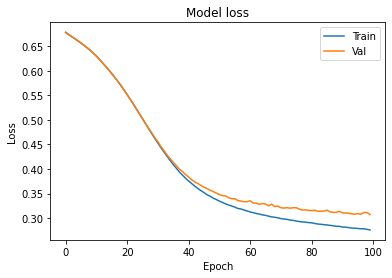

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right');

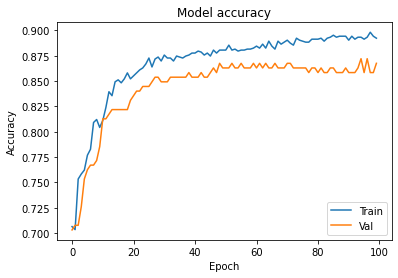

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right');

### 2nd model, adding more layers

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              11000     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 3,015,001
Trainable params: 3,015,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 0.5713 - accuracy: 0.7030 - val_loss: 0.3767 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3854 - accuracy: 0.8557 - val_loss: 0.3472 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3262 - accuracy: 0.8691 - val_loss: 0.3170 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2489 - accuracy: 0.8967 - val_loss: 0.3142 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2748 - accuracy: 0.8882 - val_loss: 0.3095 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2733 - accuracy: 0.8991 - val_loss: 0.2887 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2675 - accuracy: 0.8794 - val_loss: 0.2985 - val_accuracy: 0.9087
Epoch 

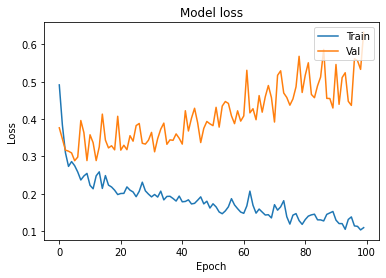

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right');

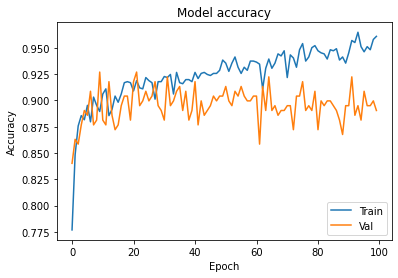

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right');

### 3rd model adding regularization and dropout to avoid overfitting in the last model

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              11000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)             

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 64ms/step - loss: 21.0957 - accuracy: 0.5802 - val_loss: 3.8861 - val_accuracy: 0.7671
Epoch 2/100
32/32 [==============================] - 2s 60ms/step - loss: 2.4910 - accuracy: 0.7820 - val_loss: 0.6704 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5843 - accuracy: 0.8634 - val_loss: 0.5333 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5514 - accuracy: 0.8390 - val_loss: 0.4909 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4784 - accuracy: 0.8830 - val_loss: 0.5240 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4991 - accuracy: 0.8680 - val_loss: 0.4724 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4962 - accuracy: 0.8662 - val_loss: 0.4687 - val_accuracy: 0.8813
Epoch

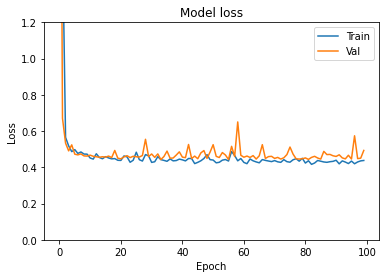

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0);

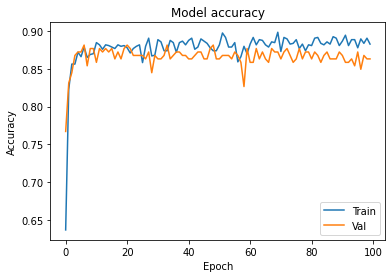

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right');

### And that's all for this task..